In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import textwrap
#parameters for selecting data: type in the start date, the latest available date in the data is the end date
param_start_date='11/08/2016'
#if param_period is set as after, then selecting the time period after the param_start_date
#if param_period is set as before, then selecting the time period before the param_start_date for equal number of tweets as after the date
#if param_period is empty then selecting all the data
param_period='before'

In [32]:
#read tweets and stock market data
name_tweets = "result.json"

with open(name_tweets, "r") as file:
    tweets_dfxx = pd.read_json(file, orient='index')
print(tweets_dfxx.columns)

tweets_dfxx.sort_index(inplace=True)
tweets_dfxx = tweets_dfxx.reset_index(drop=True)

#keep only the tweet data and drop empty rows
tweets_dataframe=tweets_dfxx[tweets_dfxx["value change"].notnull()]

print("Number of tweets: ", len(tweets_dataframe))

if param_period=='':
    tweets_df=tweets_dataframe
else:

    #select the data sets based on the param_start_date
    tweets_dfa=tweets_dataframe.loc[tweets_dataframe["timestamp"] > datetime.strptime(param_start_date, '%m/%d/%Y')]
    print("Number of tweets after the start date: ", len(tweets_dfa))

    before=len(tweets_dataframe)-2*len(tweets_dfa)
    tweets_dfb=tweets_dataframe.loc[tweets_dataframe.index>before]
    tweets_dfb=tweets_dfb.loc[tweets_dfb["timestamp"] <= datetime.strptime(param_start_date, '%m/%d/%Y')]
    print("Number of tweets before the start date: ", len(tweets_dfb))

    if param_period=='after':
        tweets_df=tweets_dfa
    if param_period=='before':
        tweets_df=tweets_dfb 

Index(['predicted changes', 'text', 'timestamp', 'tweet', 'value change'], dtype='object')
Number of tweets:  1970
Number of tweets after the start date:  797
Number of tweets before the start date:  796


In [33]:
#modifying data
tweets_df['difference'] = np.where(tweets_df["value change"]==tweets_df["predicted changes"], 1, 0)
print("Difference=1 when predicted change is equal to the real change")
tweets_df.head()

Difference=1 when predicted change is equal to the real change


,predicted changes,text,timestamp,tweet,value change,difference
377,SMAPOS,https https https so far this is one of the be...,2015-10-18 22:21:32,"""@Karen05866992: @realDonaldTrump @FoxNews So ...",SMAPOS,1
378,SMANEG,https https https i m watching it again right ...,2015-10-18 22:30:49,"""@Justice41ca: @realDonaldTrump @FoxNews I'm w...",SMAPOS,0
379,SMAPOS,best thing my supporters can do if you don t l...,2015-10-18 22:50:10,Best thing my supporters can do if you don't l...,SMAPOS,1
380,MEDNEG,https the definition of a pretentious establis...,2015-10-18 23:57:37,"""@ConserveCast: The Definition of a Pretentiou...",SMAPOS,0
381,MEDPOS,https we finally have a voice with https votet...,2015-10-19 00:38:12,"""@JulesSiscoe: We finally have a voice with @r...",SMANEG,0


In [34]:
tweets_dfx=tweets_df.loc[tweets_df["value change"]!=tweets_df["predicted changes"]]
print("Predicted change is identical to the real stock market change",len(tweets_df)-len(tweets_dfx))
print("Predicted change is not identical to the real stock market change",len(tweets_dfx))


tweets_df1x=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGPOS') | (tweets_dfx["value change"].values=='MEDPOS') |
                         (tweets_dfx["value change"].values=='SMAPOS')]
tweets_df1=tweets_df1x.loc[(tweets_df1x["predicted changes"].values=='BIGPOS') | (tweets_df1x["predicted changes"].values=='MEDPOS') |
                         (tweets_df1x["predicted changes"].values=='SMAPOS')]

tweets_df2x=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGNEG') | (tweets_dfx["value change"].values=='MEDNEG') |
                         (tweets_dfx["value change"].values=='SMANEG')]
tweets_df2=tweets_df2x.loc[(tweets_df2x["predicted changes"].values=='BIGNEG') | (tweets_df2x["predicted changes"].values=='MEDNEG') |
                         (tweets_df2x["predicted changes"].values=='SMANEG')]

print("Predicted change is not equal but the direction is the same with the real stock market change",len(tweets_df1)+len(tweets_df2))

print("The direction of predicted change is opposite to the stock market change",len(tweets_dfx)-(len(tweets_df1)+len(tweets_df2)))


Predicted change is identical to the real stock market change 200
Predicted change is not identical to the real stock market change 596
Predicted change is not equal but the direction is the same with the real stock market change 246
The direction of predicted change is opposite to the stock market change 350


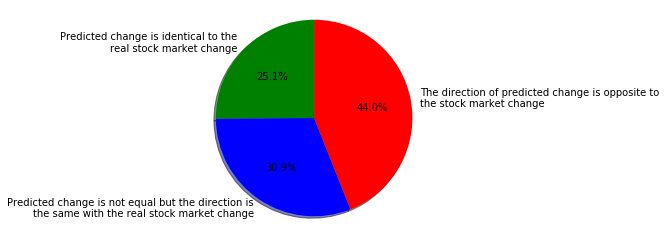

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
text1=textwrap.fill('Predicted change is identical to the real stock market change', width=40)
text2=textwrap.fill('Predicted change is not equal but the direction is the same with the real stock market change', width=50)
text3=textwrap.fill('The direction of predicted change is opposite to the stock market change', width=50)
labels = text1, text2, text3
colors  = ("green", "blue", "red")
sizes = [len(tweets_df)-len(tweets_dfx),len(tweets_df1)+len(tweets_df2),len(tweets_dfx)-(len(tweets_df1)+len(tweets_df2))]
#print(len(tweets_df),len(tweets_df1), len(tweets_df2))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:
#2 Way Cross table/frequency table for amounts of tweet distribution between original stock market change classes and 
#predicted classes
pd.crosstab(tweets_df['value change'],tweets_df['predicted changes'], margins=True)

predicted changes,BIGNEG,BIGPOS,MEDNEG,MEDPOS,SMANEG,SMAPOS,All
value change,,,,,,,
BIGNEG,27,25,17,15,20,6,110
BIGPOS,22,43,29,30,16,10,150
MEDNEG,29,29,47,28,23,19,175
MEDPOS,16,19,28,39,23,17,142
SMANEG,16,23,29,23,32,6,129
SMAPOS,10,25,19,11,13,12,90
All,120,164,169,146,127,70,796


In [37]:
    #2 Way Cross table/frequency percentage table for amounts of tweet distribution between original stock market change classes and 
#predicted classes
pd.crosstab(tweets_df['value change'],tweets_df['predicted changes'], margins=True, normalize='index')\
        .round(4)*100

predicted changes,BIGNEG,BIGPOS,MEDNEG,MEDPOS,SMANEG,SMAPOS
value change,,,,,,
BIGNEG,24.55,22.73,15.45,13.64,18.18,5.45
BIGPOS,14.67,28.67,19.33,20.00,10.67,6.67
MEDNEG,16.57,16.57,26.86,16.00,13.14,10.86
MEDPOS,11.27,13.38,19.72,27.46,16.20,11.97
SMANEG,12.40,17.83,22.48,17.83,24.81,4.65
SMAPOS,11.11,27.78,21.11,12.22,14.44,13.33
All,15.08,20.60,21.23,18.34,15.95,8.79
